In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
1000/1000 [==============================] - 92s - loss: 0.2396 - acc: 0.9258 - val_loss: 0.0401 - val_acc: 0.9866
Epoch 2/10
1000/1000 [==============================] - 91s - loss: 0.0771 - acc: 0.9761 - val_loss: 0.0302 - val_acc: 0.9902
Epoch 3/10
1000/1000 [==============================] - 93s - loss: 0.0630 - acc: 0.9809 - val_loss: 0.0248 - val_acc: 0.9903
Epoch 4/10
1000/1000 [==============================] - 92s - loss: 0.0516 - acc: 0.9838 - val_loss: 0.0189 - val_acc: 0.9940
Epoch 5/10
1000/1000 [==============================] - 91s - loss: 0.0461 - acc: 0.9858 - val_loss: 0.0177 - val_acc: 0.9945
Epoch 6/10
1000/1000 [==============================] - 92s - loss: 0.0419 - acc: 0.9867 - val_loss: 0.0209 - val_acc: 0.9930
Epoch 7/10
1000/1000 [==============================] - 92s - loss: 0.0366 - acc: 0.9889 - val_loss: 0.0190 - val_acc: 0.9941
Epoch 8/10
1000/1000 [=======================

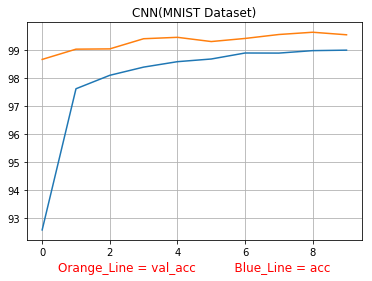

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Three steps to create a CNN
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
BatchNormalization(axis=-1)
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
BatchNormalization(axis=-1)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
BatchNormalization(axis=-1)
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
BatchNormalization(axis=-1)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
BatchNormalization()
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

his = model.fit_generator(train_generator, steps_per_epoch=1000, epochs=10, 
                    validation_data=test_generator, validation_steps=10000//64)

# acc
acc = his.history["acc"]
val_acc = his.history["val_acc"]

acc_List = []
valacc_List = []

for i in acc:
    acc_List.append(i*100)
    
for i in val_acc:
    valacc_List.append(i*100)
    
plt.grid(True)
plt.plot(acc_List)
plt.plot(valacc_List)
plt.xlabel('Orange_Line = val_acc          Blue_Line = acc', fontsize=12, color='red')
plt.title(r'CNN(MNIST Dataset)')
plt.show()